In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats

In [2]:
%matplotlib inline
sns.set_theme()
countries = {"Germany": "D",
             "Austria": "A",
             "Belgium" : "B",
             "Spain": "E",
             "France": "F",
             "Italy": "I",
             "Luxembourg": "L",
             "Netherlands": "NL"}

### Load Dataset

In [3]:
file_path = os.path.join("data", "autoscout_dataset.csv")
df = pd.read_csv(file_path, sep=";", index_col="url")

In [4]:
df['Anno'] = pd.to_datetime(df['Anno'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51212 entries, volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438 to fiat-500-1-2-lounge-gpl-grigio-08fccc9e-6977-40e4-8c4d-f0ce1bd391d3
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Acconto                  50009 non-null  float64       
 1   Anno                     49141 non-null  datetime64[ns]
 2   Carburante               51212 non-null  object        
 3   Carrozzeria              51212 non-null  object        
 4   Chilometraggio           49751 non-null  float64       
 5   Cilindrata_cm3           47920 non-null  float64       
 6   Cilindri                 39815 non-null  float64       
 7   Colore                   48701 non-null  object        
 8   Comfort                  47307 non-null  object        
 9   Consumo_comb_L100km      38525 non-null  fl

In [6]:
df.describe()

,Acconto,Chilometraggio,Cilindrata_cm3,Cilindri,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,garanzia_mesi,makeId,modelOrModelLineId,potenza_cv,potenza_kw,price,zip
count,50009.000000,4.975100e+04,47920.000000,39815.000000,38525.000000,33414.000000,33504.000000,3.775600e+04,39645.000000,31023.000000,48880.000000,48924.000000,34204.000000,23692.000000,51212.000000,50829.000000,50983.000000,50983.000000,5.121200e+04,51210.000000
mean,1278.238477,8.297624e+04,1613.047433,3.916338,5.237965,4.615966,6.451970,6.531812e+02,6.004969,1424.696483,4.552271,4.765616,15120.088995,14.363161,1653.648949,19734.978418,131.289469,96.508993,2.219403e+04,35810.746378
std,3635.145770,7.884387e+04,609.360887,0.864949,1.855221,1.429440,2.423182,7.277983e+04,1.313202,388.571469,0.866465,0.810794,7185.215685,8.315244,5486.954590,19885.617886,79.309339,58.323493,6.889469e+04,25419.985692
min,0.000000,0.000000e+00,0.000000,0.000000,0.100000,0.100000,0.100000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,600.000000,0.000000,6.000000,1600.000000,1.000000,1.000000,1.000000e+00,0.000000
25%,0.000000,3.100000e+04,1242.000000,4.000000,4.200000,3.900000,5.000000,1.050000e+02,5.000000,1170.000000,5.000000,5.000000,9500.000000,12.000000,28.000000,2090.000000,90.000000,66.000000,1.149975e+04,20013.000000
50%,0.000000,6.847900e+04,1499.000000,4.000000,4.900000,4.300000,6.000000,1.190000e+02,6.000000,1395.000000,5.000000,5.000000,14900.000000,12.000000,42.000000,18481.000000,116.000000,85.000000,1.719900e+04,31059.000000
75%,0.000000,1.200000e+05,1968.000000,4.000000,5.800000,5.000000,7.200000,1.390000e+02,7.000000,1610.000000,5.000000,5.000000,20300.000000,12.000000,64.000000,20008.000000,150.000000,110.000000,2.590000e+04,50019.000000
max,60000.000000,8.888888e+06,15607.000000,12.000000,69.000000,75.000000,88.000000,9.999999e+06,11.000000,31000.000000,7.000000,22.000000,30000.000000,99.000000,51924.000000,76377.000000,8651.000000,6363.000000,9.999999e+06,98161.000000


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Acconto,Anno,Carburante,Carrozzeria,Chilometraggio,Cilindrata_cm3,Cilindri,Colore,Comfort,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Extra,Intrattenimento__Media,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,Sicurezza,Tagliandi_certificati,Tipo_di_cambio,Tipo_di_veicolo,Trazione,city,country,countryCode,date,garanzia_mesi,makeId,maker,model,modelOrModelLineId,modelVersionInput,potenza_cv,potenza_kw,price,street,unico_proprietario,zip
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438,0.0,2016-09-01,Diesel,Berlina,115172.0,1598.0,4.0,Bianco,Alzacristalli elettrici;Climatizzatore;Cruise ...,3.0,3.0,4.0,101.0,Freno di stazionamento elettrico;Marmitta cata...,Autoradio;Bluetooth;CD;USB;Vivavoce,NaN,1312.0,5.0,5.0,14500.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,Anteriore,Bolzano - Bz,Italy,IT,2022-11-05 19:24:48.964971,12.0,74,Volkswagen,Golf,2084.0,1.6 tdi 90 cv 5p. business trendline bluemotio...,90.0,66.0,14500.0,"Via Lancia, 3",False,39100.0
bmw-430-m-sport-19-navi-pro-tetto-apribile-pdc-keyless-benzina-nero-e6fef875-6ade-407e-ab12-58f424825195,0.0,2021-10-01,Benzina,Cabrio,10900.0,1998.0,4.0,Nero,Alzacristalli elettrici;Bracciolo;Chiusura cen...,NaN,NaN,NaN,NaN,"Cerchi in lega (19"");Leve al volante;Luce d'am...",Schermo multifunzione interamente digitale;Sou...,8.0,NaN,3.0,5.0,NaN,ABS;Airbag conducente;Airbag laterali;Airbag p...,True,Automatico,Aziendale,Posteriore,Merate - Lecco - LC,Italy,IT,2022-11-05 19:24:49.633149,NaN,13,BMW,430,20330.0,M SPORT -19\,245.0,180.0,62900.0,"Via Sandro Pertini, 23",True,23807.0
renault-master-t35-2-3-dci-135cv-l2h2-ice-e6d-temp-diesel-bianco-afd0cb83-a5ed-40bc-8627-eb48c94ae24d,0.0,NaT,Diesel,Furgone,0.0,2299.0,4.0,Bianco,Cruise Control;Sensore di luminosità;Sensore d...,6.7,NaN,NaN,177.0,NaN,CD;MP3,6.0,20.0,4.0,3.0,28550.0,Airbag conducente;Airbag laterali;Fari LED,False,Manuale,Nuovo,Anteriore,Porto Mantovano - Mantova - Mn,Italy,IT,2022-11-05 19:24:50.333591,24.0,60,Renault,Master,14717.0,T35 2.3 dci 135cv L2H2 Ice E6d-temp,135.0,99.0,28550.0,Strada Marmirolo 5,False,46047.0
peugeot-5008-1-6-hdi-8v-business-112cv-diesel-grigio-e95e6b9f-55dc-460f-8c61-6eed529eacc3,0.0,2010-11-01,Diesel,Monovolume,196000.0,1560.0,4.0,Grigio,Alzacristalli elettrici;Bracciolo;Climatizzato...,5.3,4.6,6.5,NaN,Cerchi in lega;Ruotino,Autoradio;Bluetooth;Computer di bordo;MP3;Soun...,6.0,1547.0,5.0,7.0,5490.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,NaN,Motta di Livenza - TV,Italy,IT,2022-11-05 19:24:51.679939,NaN,55,Peugeot,5008,19235.0,1.6 hdi 8v Business 112cv,111.0,82.0,5490.0,Via Piemonte 5,False,31045.0
stin-healey-3000-mk3-benzina-rosso-99e0017a-354f-4fe3-9273-7c2d83407f10,0.0,1964-01-01,Benzina,Cabrio,3000.0,3000.0,6.0,Rosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,4.0,NaN,NaN,False,Manuale,Epoca,Posteriore,Roncadelle - Brescia - BS,Italy,IT,2022-11-05 19:24:53.177445,NaN,51901,Austin-Healey,3000,76119.0,mk3,150.0,110.0,64800.0,"Via San Bernardino, 67",False,25030.0


### Find Missing data

In [8]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(12,10))
        plt.show()
    else:
        print('No NAs found')



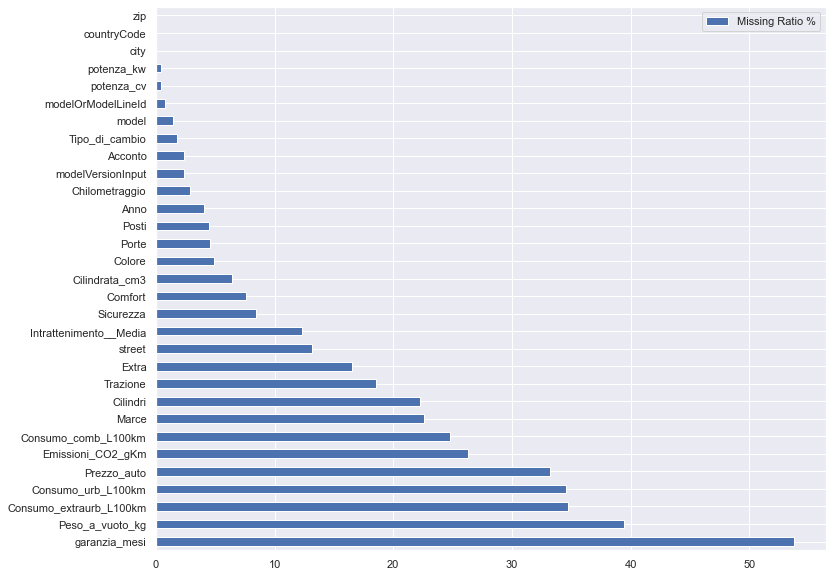

In [9]:
plot_nas(df)

### Value counts for some categorical data

In [10]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in ['maker', 'model', 'Carburante', 'Trazione', 'Tipo_di_cambio', 'Colore']],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [11]:
unique_counts

,Column_Name,Num_Unique
3,Trazione,3
4,Tipo_di_cambio,3
2,Carburante,7
5,Colore,14
0,maker,101
1,model,1197


<AxesSubplot:>

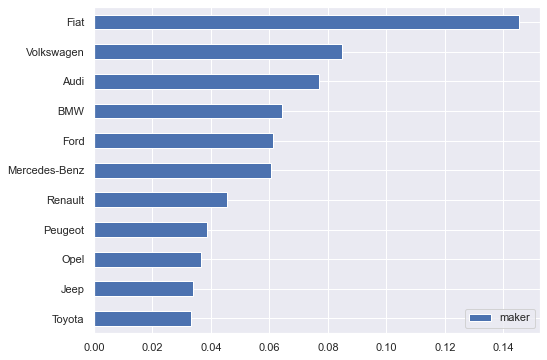

In [12]:
col = 'maker'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

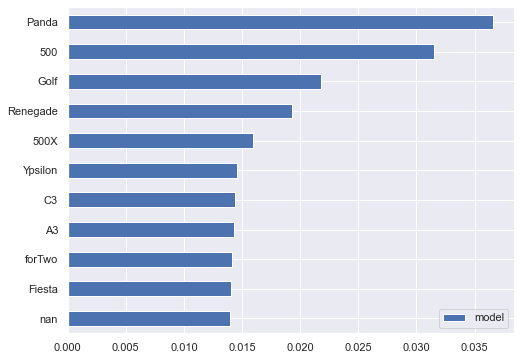

In [13]:
col = 'model'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

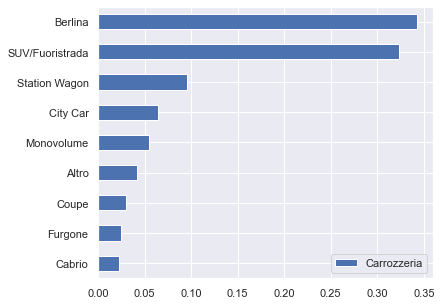

In [14]:
col = 'Carrozzeria'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

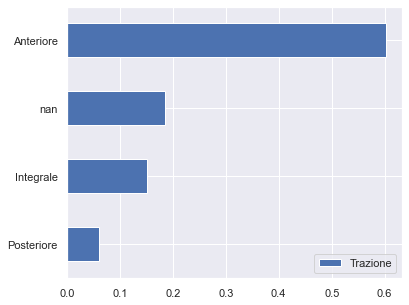

In [15]:
col = 'Trazione'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

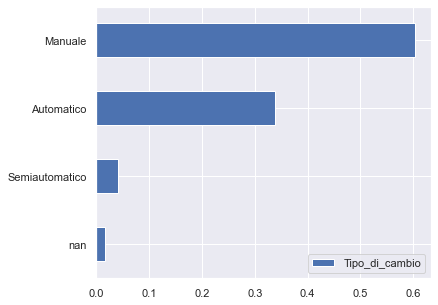

In [16]:
col = 'Tipo_di_cambio'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

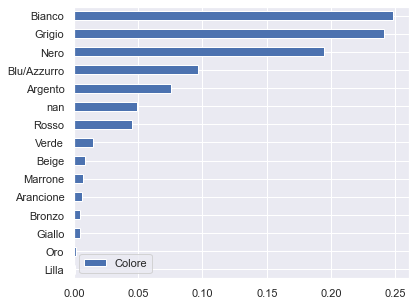

In [17]:
col = 'Colore'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

### Numerical variables exploration

In [18]:
var_corr = df[['price', 'potenza_kw', 'Cilindrata_cm3', 'Chilometraggio','Consumo_comb_L100km', 'unico_proprietario', 'Peso_a_vuoto_kg', 'Posti', 'garanzia_mesi']].corr()

In [19]:
var_corr

,price,potenza_kw,Cilindrata_cm3,Chilometraggio,Consumo_comb_L100km,unico_proprietario,Peso_a_vuoto_kg,Posti,garanzia_mesi
price,1.000000,0.173007,0.131710,-0.088230,0.059958,0.011421,0.097750,-0.002492,0.188656
potenza_kw,0.173007,1.000000,0.664714,0.013808,0.376151,0.014560,0.479022,0.055823,0.050916
Cilindrata_cm3,0.131710,0.664714,1.000000,0.246515,0.466849,0.046249,0.633501,0.087505,0.006151
Chilometraggio,-0.088230,0.013808,0.246515,1.000000,0.145974,0.021609,0.098560,0.063874,-0.219801
Consumo_comb_L100km,0.059958,0.376151,0.466849,0.145974,1.000000,-0.028390,0.324925,-0.051276,0.009350
unico_proprietario,0.011421,0.014560,0.046249,0.021609,-0.028390,1.000000,0.012263,-0.001995,-0.083755
Peso_a_vuoto_kg,0.097750,0.479022,0.633501,0.098560,0.324925,0.012263,1.000000,0.254939,0.050529
Posti,-0.002492,0.055823,0.087505,0.063874,-0.051276,-0.001995,0.254939,1.000000,0.008953
garanzia_mesi,0.188656,0.050916,0.006151,-0.219801,0.009350,-0.083755,0.050529,0.008953,1.000000


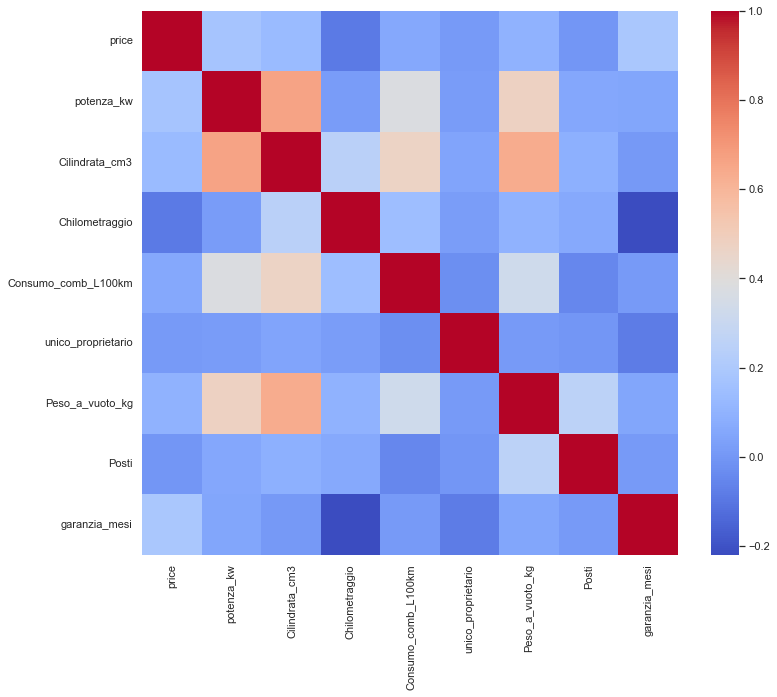

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(var_corr, cmap="coolwarm");

<AxesSubplot:ylabel='Frequency'>

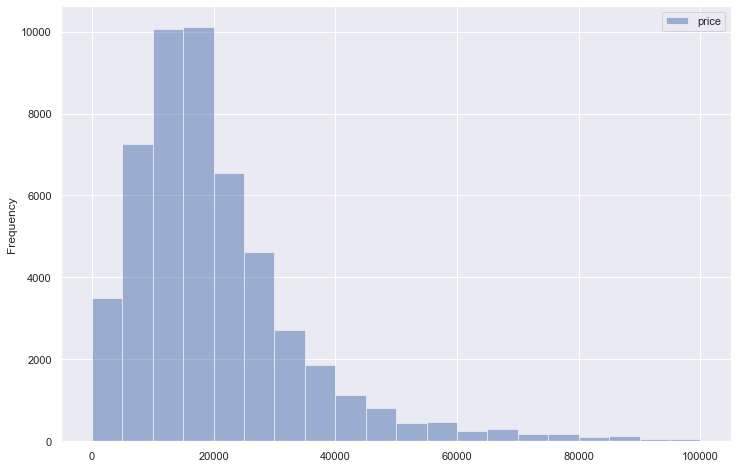

In [21]:
#df['price'].apply(np.log).plot.hist(bins=20 ,legend=True, alpha=0.5, figsize=(12,8))
df['price'].plot.hist(bins=20, range=(0, 1e5), legend=True, alpha=0.5, figsize=(12,8))

Comparing pricese with Lognorm distribuition

In [22]:
shape, loc, scale = stats.lognorm.fit(df.price[df.price<1e5], floc=0.)
dist = stats.lognorm(shape, loc, scale)
rvs = dist.rvs(len(df))

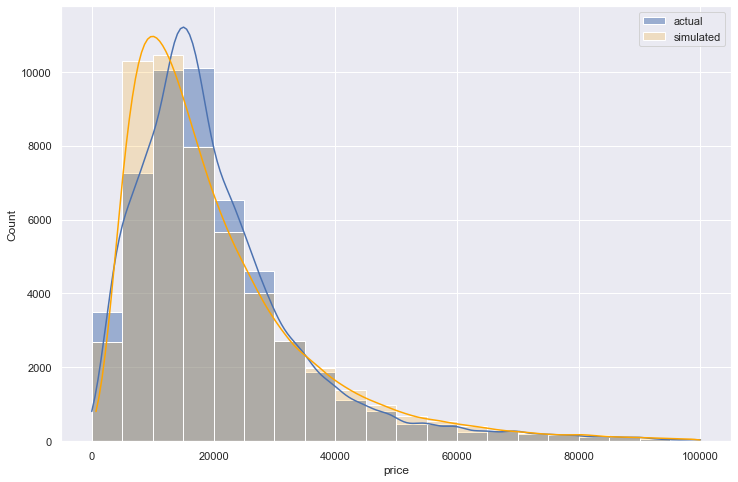

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df.price[df.price<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label = 'actual');
sns.histplot(rvs[rvs<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label='simulated', color='orange', alpha=0.2);
plt.legend();

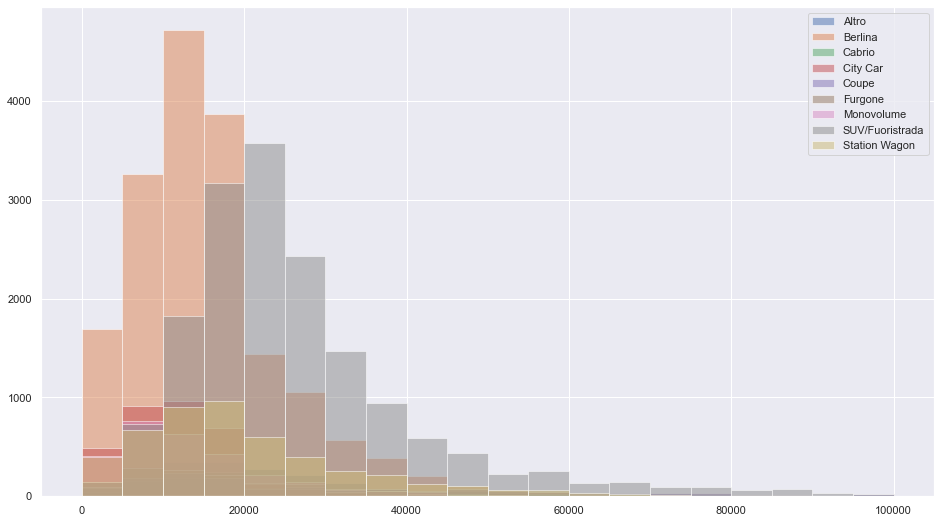

In [24]:
df.groupby('Carrozzeria',sort=True)['price'].hist(bins=20, density=False, range=(0,1e5), alpha=0.5, legend=True, figsize=(16,9));

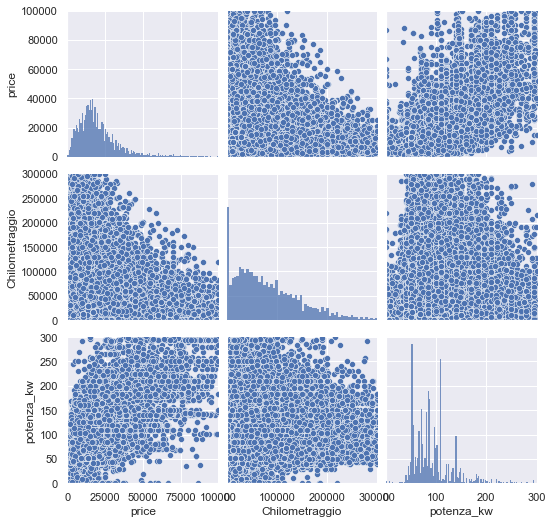

In [9]:
cont_var_pp = sns.pairplot(df[['price', 'Chilometraggio', 'potenza_kw', 'Anno']]);
cont_var_pp.axes[0,0].set_xlim((0,1e5));
cont_var_pp.axes[0,1].set_xlim((0,3e5));
cont_var_pp.axes[0,2].set_xlim((0,300));
cont_var_pp.axes[0,0].set_ylim((0,1e5));
cont_var_pp.axes[1,0].set_ylim((0,3e5));
cont_var_pp.axes[2,0].set_ylim((0,300));

## Pandas profiling

In [11]:
from pandas_profiling import ProfileReport

In [12]:
profile = ProfileReport(df, title="Car Web Profiling Report")

In [ ]:
##profile